##### Student Name - Aakash Jain.
##### Roll No. - 222010019.
##### Subject - Data Mining Laboratory.
##### Assignment IV - Apply decision tree algorithm and Naive Bayes algorithm to a iris dataset and interpret the results. Compare the performance of these classifiers with svm, knn and logistic regressor for the same dataset.

Import dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

Import iris dataset, drop redundant features.

In [3]:
df = pd.read_csv('./datasets/iris.csv')
df.drop(['Id'], axis=1, inplace=True)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,6.5,2.8,4.6,1.5,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa


Split dataset among training and testing.

In [4]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state=19)

Train and test with Gini index.

In [5]:
Classifier = DecisionTreeClassifier()
Classifier.fit(X_Train, Y_Train)

Y_Predict = Classifier.predict(X_Test)
gini_acc = accuracy_score(Y_Test, Y_Predict)
print("Accuracy with Gini Index: ", gini_acc)
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, Y_Predict))

Accuracy with Gini Index:  1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


Visualize tree generated with Gini index.

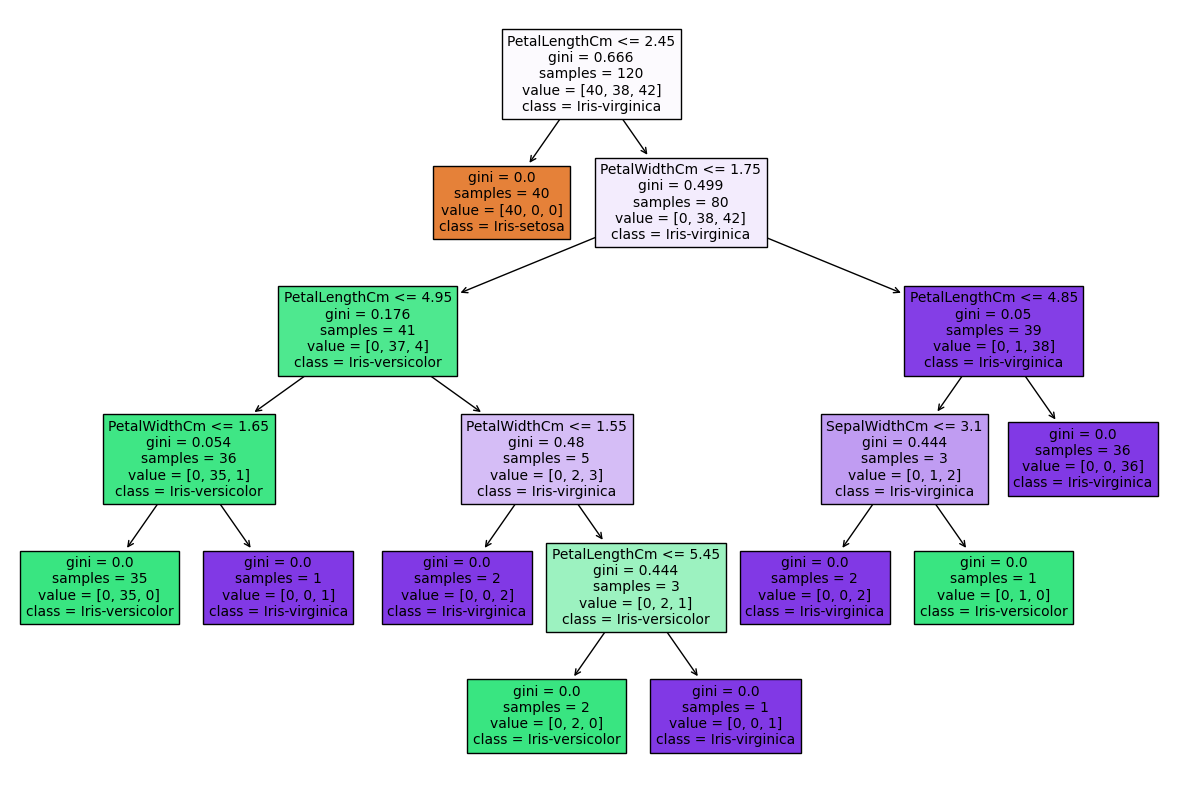

In [6]:
plt.figure(figsize=(15, 10))
tree.plot_tree(Classifier, feature_names=df.columns[:-1], class_names=df.Species.unique(), filled=True)
plt.show()

Train and test with Naive Bayes variants - Bernoulli's, MultiNomial and Gaussian.

In [8]:
BernNB = BernoulliNB(binarize = 1.8)
BernNB.fit(X_Train, Y_Train)

Y_Predict = BernNB.predict(X_Test)
NBbern_acc = accuracy_score(Y_Test, Y_Predict)
print("Accuracy with Bernoulli's Naive Bayes: ", NBbern_acc)
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, Y_Predict))

Accuracy with Bernoulli's Naive Bayes:  0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]


In [9]:
MultiNB = MultinomialNB()
MultiNB.fit(X_Train, Y_Train)

Y_Predict = MultiNB.predict(X_Test)
NBmulti_acc = accuracy_score(Y_Test, Y_Predict)
print("Accuracy with Multinomial Naive Bayes: ", NBmulti_acc)
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, Y_Predict))

Accuracy with Multinomial Naive Bayes:  0.7666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  5  7]
 [ 0  0  8]]


In [10]:
GaussNB = GaussianNB()
GaussNB.fit(X_Train, Y_Train)

Y_Predict = GaussNB.predict(X_Test)
NBgauss_acc =  accuracy_score(Y_Test, Y_Predict)
print("Accuracy with Gaussian Naive Bayes: ", NBgauss_acc)
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, Y_Predict))

Accuracy with Gaussian Naive Bayes:  0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


Train and test with Support Vector Machine.

In [11]:
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
svm_Y_Train = Y_Train.map(mapping)
svm_Y_Test = Y_Test.map(mapping)

svm_classifier = SVC()
svm_classifier.fit(X_Train, svm_Y_Train)
Y_Predict = svm_classifier.predict(X_Test)
svm_acc = accuracy_score(svm_Y_Test, Y_Predict)
print("Accuracy with Support Vector Machine: ", svm_acc)
print("\nConfusion Matrix:\n", confusion_matrix(svm_Y_Test, Y_Predict))

Accuracy with Support Vector Machine:  1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


Train and test with K-nearest neighbors.

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_Train, Y_Train)

Y_Predict = knn.predict(X_Test)
knn_acc = accuracy_score(Y_Test, Y_Predict)
print("Accuracy with K-Nearest Neighbors (k = 3): ", knn_acc)
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, Y_Predict))

Accuracy with K-Nearest Neighbors (k = 3):  1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [13]:
Reg = LogisticRegression(solver= 'lbfgs', max_iter=500)
Reg.fit(X_Train, Y_Train)

Y_Pred = Reg.predict(X_Test)
reg_acc = accuracy_score(Y_Test,Y_Predict)
print("Accuracy with Logistic Regression: ", reg_acc)
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, Y_Predict))

Accuracy with Logistic Regression:  1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


#### Summary:

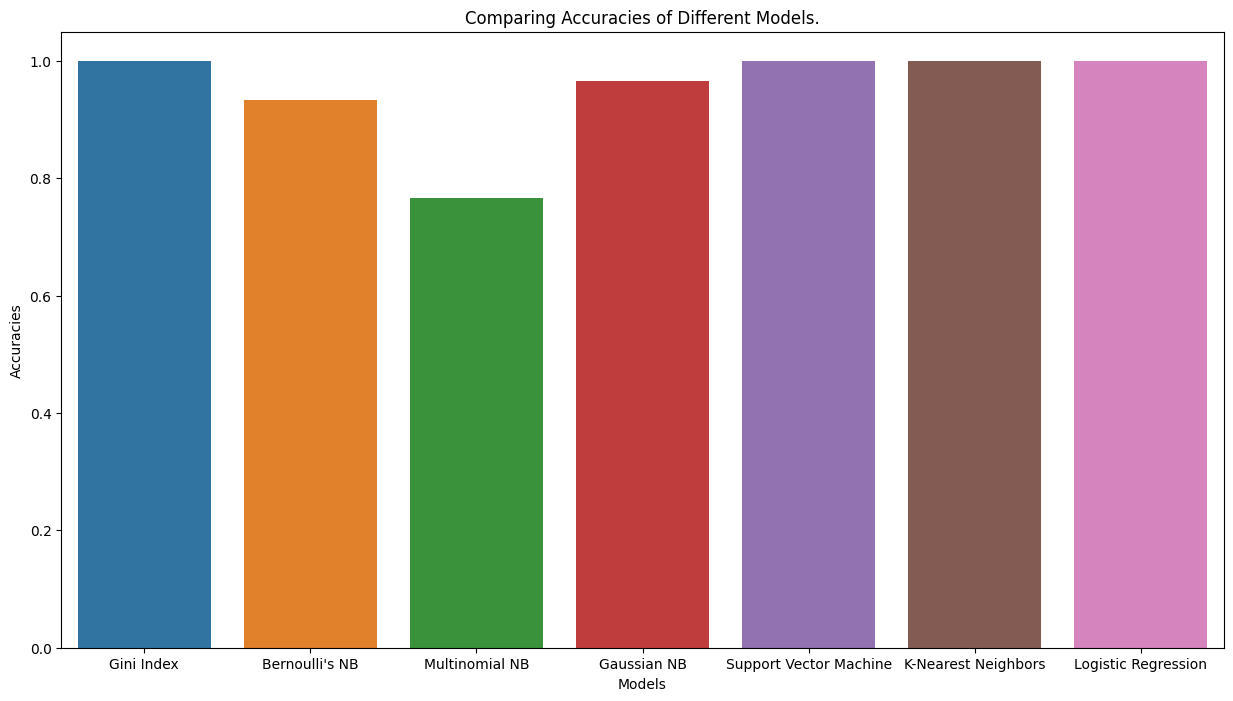

In [14]:
results = pd.DataFrame({'Models': ['Gini Index', 
                               'Bernoulli\'s NB', 
                               'Multinomial NB', 
                               'Gaussian NB',
                               'Support Vector Machine',
                               'K-Nearest Neighbors',
                               'Logistic Regression'],
                       "Accuracies": [
                               gini_acc, NBbern_acc, NBmulti_acc, NBgauss_acc, svm_acc, knn_acc, reg_acc,
                       ]})

plt.subplots(figsize=(15, 8))
sns.barplot(x='Models', y='Accuracies', data = results)
plt.title('Comparing Accuracies of Different Models.')
plt.show()